- ref. http://qiita.com/taka4sato/items/802c494fdebeaa7f43b7
- ref. https://www.kaggle.com/startupsci/titanic-data-science-solutions
- ref. https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

In [1]:
# 訓練データの読み込み
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
import random as rnd

train_df = pd.read_csv("./train.csv", header=0)
test_df = pd.read_csv("./test.csv", header=0)
dfd = {'train': train_df, 'test': test_df}
for name,df in dfd.items():
    print(name)
    print(df.columns.values)
    print(df.head(3))
    print(df.info())
    print(df.describe(include='all'))

train
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name          

In [2]:
# categoricalな値の範囲
for name,df in dfd.items():
    print(name)
    for column in ['Sex', 'Cabin', 'Embarked']:
        print(df[column].unique())

train
['male' 'female']
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49' 'F4'
 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77' 'E67'
 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106' 'C65'
 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91' 'E40'
 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34' 'C104'
 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79' 'E25'
 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68' 'A10'
 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58' 'C126'
 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90' 'C45'
 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6' 'B82 B84'
 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50' 'B42' 'C148']
['S' 'C' 'Q' nan]
te

In [3]:
# 欠損値を確認
for name,df in dfd.items():
    print(name)
    print(df.isnull().sum())

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [4]:
# 欠損値を補完
for name,df in dfd.items():
    print(name)
    for column in ["Age", "Fare"]:
        median_age = df[column].dropna().median()
        if len(df[column][ df[column].isnull() ]) > 0:
            df.loc[(df[column].isnull()), column] = median_age   # とりあえず全体の平均
        print(column, median_age)
    if len(df['Embarked'][ df['Embarked'].isnull() ]) > 0:
        df.loc[(df['Embarked'].isnull()), 'Embarked'] = 'S'   # 最頻値

train
Age 28.0
Fare 14.4542
test
Age 27.0
Fare 14.4542


In [5]:
# categoricalな値とSurvivedとの相関
for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
    print(train_df[[column, 'Survived']].groupby([column], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


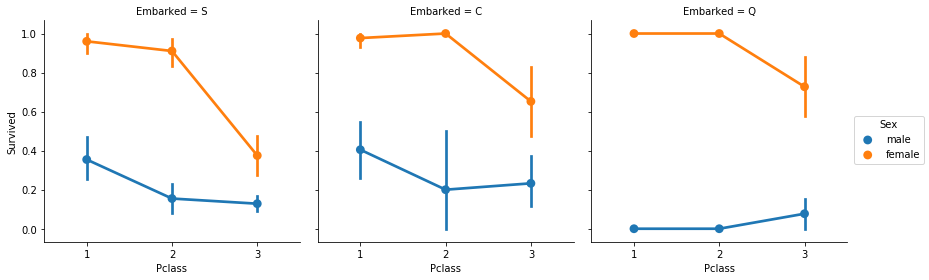

In [6]:
# categoricalな値とSurvivedとの相関
sns.factorplot(data=train_df, x='Pclass', y='Survived', hue='Sex', col='Embarked')
plt.show()

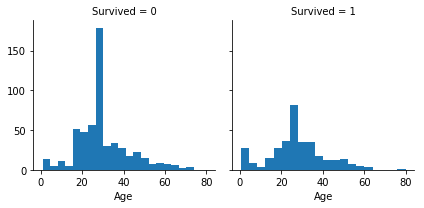

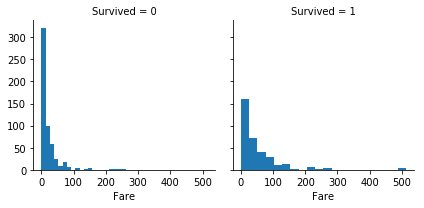

In [7]:
# numericalな値とSurvivedとの相関
for column in ['Age', 'Fare']:
    g = sns.FacetGrid(train_df, col='Survived')
    g.map(plt.hist, column, bins=20)
plt.show()

In [8]:
# categoricalおよびnumericalな値とSurvivedとの相関
# 時間がかかる。。
# for value in ['Age', 'Fare']:
#     for row in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']:
#         g = sns.FacetGrid(train_df, col='Survived', row=row)
#         g.map(plt.hist, value, bins=20)
# plt.show()

In [9]:
for name,df in dfd.items():
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['withFamily'] = 1
    df.loc[df['FamilySize']==1, 'withFamily'] = 0
for column in ['FamilySize', 'withFamily']:
    print(train_df[[column, 'Survived']].groupby([column], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000
   withFamily  Survived
1           1  0.505650
0           0  0.303538


In [10]:
# Titleの種類
for name,df in dfd.items():
    df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    print(name)
    print(pd.crosstab(df['Title'], df['Sex']))

train
Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1
test
Sex     female  male
Title               
Col          0     2
Dona         1     0
Dr           0     1
Master       0    21
Miss        78     0
Mr           0   240
Mrs         72     0
Ms           1     0
Rev          0     2


In [11]:
# Titleを置換
for name,df in dfd.items():
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir', 'Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Mme'], 'Mrs')
print(train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [12]:
# 置換漏れを確認
for name,df in dfd.items():
    print(name)
    print(df['Title'].unique())

train
['Mr' 'Mrs' 'Miss' 'Master' 'Rare']
test


['Mr' 'Mrs' 'Miss' 'Master' 'Rare']


In [13]:
# 使用方法を思いつかないデータを削除 (テストデータのIDは別に保存する)
ids = test_df["PassengerId"].values
for name,df in dfd.items():
    df.drop(["Ticket", "PassengerId"], axis=1, inplace=True)
    print(name)
    print(df.head(3))

train
   Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   

      Sex   Age  SibSp  Parch     Fare Cabin Embarked  FamilySize  withFamily  \
0    male  22.0      1      0   7.2500   NaN        S           2           1   
1  female  38.0      1      0  71.2833   C85        C           2           1   
2  female  26.0      0      0   7.9250   NaN        S           1           0   

  Title  
0    Mr  
1   Mrs  
2  Miss  
test
   Pclass                              Name     Sex   Age  SibSp  Parch  \
0       3                  Kelly, Mr. James    male  34.5      0      0   
1       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2       2         Myles, Mr. Thomas Francis    male  62.0      0      0   

     Fare Cabin Embarked  

In [14]:
# ダミー変数に変換
for name,df in dfd.items():
    df["Pclass"] = df["Pclass"].map( {1: 3, 2: 2, 3: 1} ).astype(int)
    df["Sex"] = df["Sex"].map( {"female": 1, "male": 0} ).astype(int)
    df["Embarked"] = df["Embarked"].map( {"Q": 3, "C": 2, "S": 1} ).astype(int)
    df["Title"] = df["Title"].map( {"Mrs": 5, "Miss": 4, "Master": 3, "Rare": 2, "Mr": 1} ).astype(int)
    print(name)
    print(df.head(3))

train
   Survived  Pclass                                               Name  Sex  \
0         0       1                            Braund, Mr. Owen Harris    0   
1         1       3  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       1                             Heikkinen, Miss. Laina    1   

    Age  SibSp  Parch     Fare Cabin  Embarked  FamilySize  withFamily  Title  
0  22.0      1      0   7.2500   NaN         1           2           1      1  
1  38.0      1      0  71.2833   C85         2           2           1      5  
2  26.0      0      0   7.9250   NaN         1           1           0      4  
test
   Pclass                              Name  Sex   Age  SibSp  Parch    Fare  \
0       1                  Kelly, Mr. James    0  34.5      0      0  7.8292   
1       1  Wilkes, Mrs. James (Ellen Needs)    1  47.0      1      0  7.0000   
2       2         Myles, Mr. Thomas Francis    0  62.0      0      0  9.6875   

  Cabin  Embarked  FamilySize  

In [15]:
# 欠損値を補完
mean_ages = np.zeros((2, 3))
for name,df in dfd.items():
    for i in range(0, 2):
        for j in range(0, 3):
            mean_df = df[(df['Sex']==i) & (df['Pclass']==j+1)]['Age'].dropna()
            df.loc[(df['Age'].isnull()) & (df['Sex']==i) & (df['Pclass']==j+1), 'Age'] = int(mean_df.median())
    df['Age'] = df['Age'].astype(int)

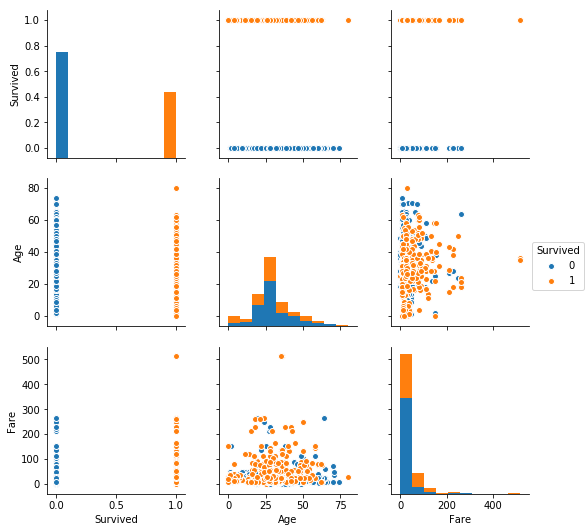

In [16]:
sns.pairplot(train_df[['Survived', 'Age', 'Fare']], hue='Survived')
plt.show()

In [17]:
# for name,df in dfd.items():
#     df['Age'] = df['Age'] / 10
#     print(name)
#     print(df.head())
# Banding
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
print(train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True))
train_df.drop(["AgeBand"], axis=1, inplace=True)

for name,df in dfd.items():
    df.loc[ df['Age'] <= 16, 'Age'] = 5
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 4
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 3
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 2
    df.loc[ df['Age'] > 64, 'Age'] = 1

         AgeBand  Survived
0  (-0.08, 16.0]  0.550000
1   (16.0, 32.0]  0.344762
2   (32.0, 48.0]  0.403226
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [18]:
# for name,df in dfd.items():
#     df['Fare'] = df['Fare'] / 50
#     print(name)
#     print(df.head())
# Banding
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
print(train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True))
train_df.drop(["FareBand"], axis=1, inplace=True)

for name,df in dfd.items():
    df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
    df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
    df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']   = 2
    df.loc[ df['Fare'] > 31, 'Fare'] = 3
    df['Fare'] = df['Fare'].astype(int)
    print(name)
    print(df.head())

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


train
   Survived  Pclass                                               Name  Sex  \
0         0       1                            Braund, Mr. Owen Harris    0   
1         1       3  Cumings, Mrs. John Bradley (Florence Briggs Th...    1   
2         1       1                             Heikkinen, Miss. Laina    1   
3         1       3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1   
4         0       1                           Allen, Mr. William Henry    0   

   Age  SibSp  Parch  Fare Cabin  Embarked  FamilySize  withFamily  Title  
0    4      1      0     0   NaN         1           2           1      1  
1    3      1      0     3   C85         2           2           1      5  
2    4      0      0     1   NaN         1           1           0      4  
3    3      1      0     3  C123         1           2           1      5  
4    3      0      0     1   NaN         1           1           0      1  
test
   Pclass                                          Name  S

In [19]:
for name,df in dfd.items():
    df['Name'] = df['Name'].apply(len)
#train_df['Name'] = pd.qcut(train_df['Name'], 4)
#for name,df in dfd.items():
    df.loc[ df['Name'] <= 20, 'Name'] = 1
    df.loc[(df['Name'] > 20) & (df['Name'] <= 25), 'Name'] = 2
    df.loc[(df['Name'] > 25) & (df['Name'] <= 30), 'Name'] = 3
    df.loc[ df['Name'] > 30, 'Name'] = 4
    df['Name'] = df['Name'].astype(int)
    print(name)
    print(df.head())
print(train_df[['Name', 'Survived']].groupby(['Name'], as_index=False).mean().sort_values(by='Name', ascending=True))

train
   Survived  Pclass  Name  Sex  Age  SibSp  Parch  Fare Cabin  Embarked  \
0         0       1     2    0    4      1      0     0   NaN         1   
1         1       3     4    1    3      1      0     3   C85         2   
2         1       1     2    1    4      0      0     1   NaN         1   
3         1       3     4    1    3      1      0     3  C123         1   
4         0       1     2    0    3      0      0     1   NaN         1   

   FamilySize  withFamily  Title  
0           2           1      1  
1           2           1      5  
2           1           0      4  
3           2           1      5  
4           1           0      1  
test
   Pclass  Name  Sex  Age  SibSp  Parch  Fare Cabin  Embarked  FamilySize  \
0       1     1    0    3      0      0     0   NaN         3           1   
1       1     4    1    3      1      0     0   NaN         1           2   
2       2     2    0    2      0      0     1   NaN         3           1   
3       1     1    0

In [20]:
for name,df in dfd.items():
    df['Cabin'] = df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
    print(name)
    print(df.head())

train
   Survived  Pclass  Name  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  \
0         0       1     2    0    4      1      0     0      0         1   
1         1       3     4    1    3      1      0     3      1         2   
2         1       1     2    1    4      0      0     1      0         1   
3         1       3     4    1    3      1      0     3      1         1   
4         0       1     2    0    3      0      0     1      0         1   

   FamilySize  withFamily  Title  
0           2           1      1  
1           2           1      5  
2           1           0      4  
3           2           1      5  
4           1           0      1  
test
   Pclass  Name  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked  FamilySize  \
0       1     1    0    3      0      0     0      0         3           1   
1       1     4    1    3      1      0     0      0         1           2   
2       2     2    0    2      0      0     1      0         3           1   
3       1 

In [21]:
# categoricalな値とSurvivedとの相関
# for column in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'withFamily', 'FamilySize', 'Age', 'Fare', 'Title']:
#     print(train_df[[column, 'Survived']].groupby([column], as_index=False).mean().sort_values(by='Survived', ascending=False))

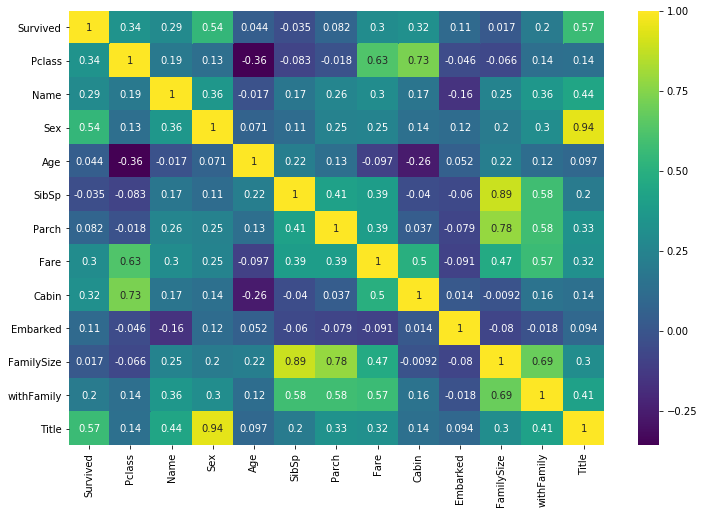

In [22]:
# 各feature間の相関
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.astype(float).corr(), cmap=plt.cm.viridis, annot=True)
plt.show()

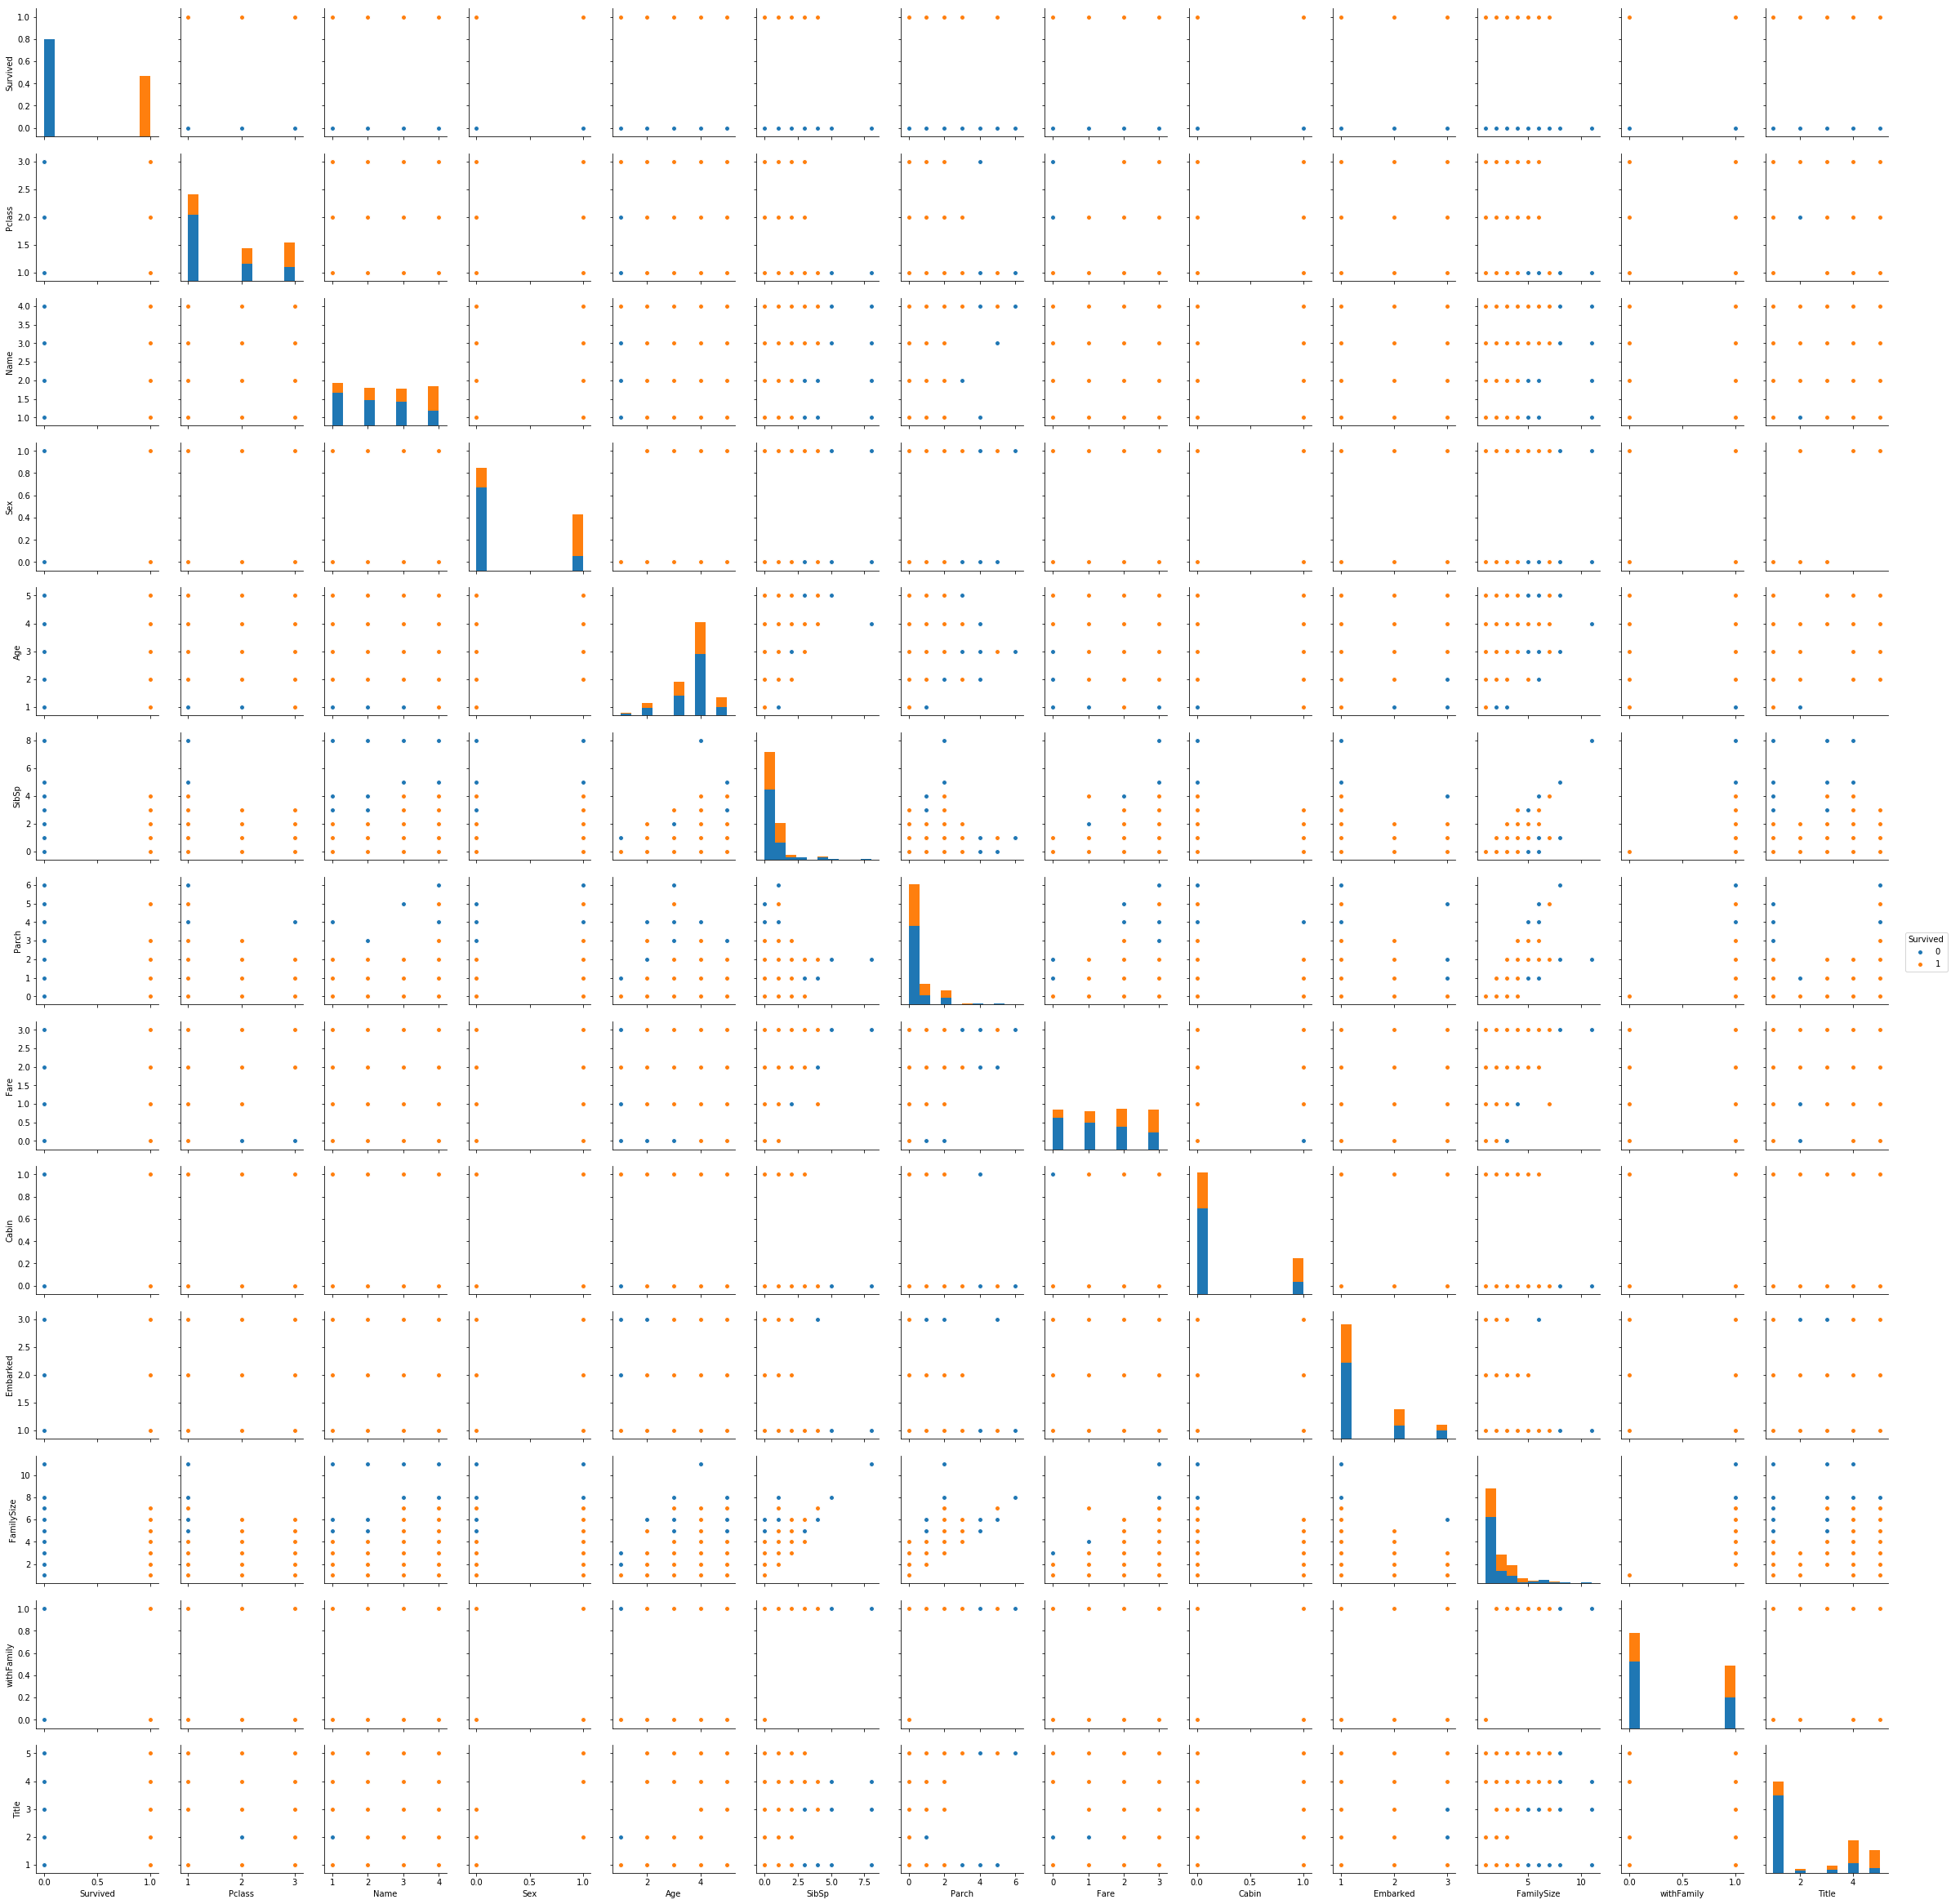

In [23]:
# 各feature間の相関
# categoricalな値同士だと、点が重なって役に立たない
plt.figure(figsize=(12, 8))
sns.pairplot(train_df, hue='Survived')
plt.show()

In [24]:
for name,df in dfd.items():
    df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    print(name)
    print(df.head(3))

train
   Survived  Pclass  Name  Sex  Age  Fare  Cabin  Embarked  FamilySize  \
0         0       1     2    0    4     0      0         1           2   
1         1       3     4    1    3     3      1         2           2   
2         1       1     2    1    4     1      0         1           1   

   withFamily  Title  
0           1      1  
1           1      5  
2           0      4  
test
   Pclass  Name  Sex  Age  Fare  Cabin  Embarked  FamilySize  withFamily  \
0       1     1    0    3     0      0         3           1           0   
1       1     4    1    3     0      0         1           2           1   
2       2     2    0    2     1      0         3           1           0   

   Title  
0      1  
1      5  
2      1  


In [25]:
# 各featureとSurvivedとの相関
for column in df:
    print(train_df[[column, 'Survived']].groupby([column], as_index=False).mean().sort_values(by='Survived', ascending=False))

   Pclass  Survived
2       3  0.629630
1       2  0.472826
0       1  0.242363
   Name  Survived
3     4  0.626126
2     3  0.364929
1     2  0.325581
0     1  0.230453
   Sex  Survived
1    1  0.742038
0    0  0.188908
   Age  Survived
4    5  0.550000
1    2  0.434783
2    3  0.403226
3    4  0.344762
0    1  0.090909
   Fare  Survived
3     3  0.581081
2     2  0.445415
1     1  0.308756
0     0  0.197309
   Cabin  Survived
1      1  0.666667
0      0  0.299854
   Embarked  Survived
1         2  0.553571
2         3  0.389610
0         1  0.339009
   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000
   withFamily  Survived
1           1  0.505650
0           0  0.303538
   Title  Survived
4      5  0.793651
3      4  0.702703
2      3  0.575000
1      2  0.347826
0      1  0.156673


In [26]:
# パラメータ探索
from sklearn import svm
from sklearn.model_selection import GridSearchCV

train_x = train_df.values[0::,1::]
train_y = train_df.values[0::,0]
test_x = test_df.values

C_list = np.logspace(-1, 3, 5)
gamma_list = np.logspace(-2, 0, 3)
tuned_parameters = [
#    {'C': C_list, 'kernel': ['poly'], 'degree': [2, 3, 4], 'gamma': gamma_list},
#    {'C': C_list, 'kernel': ['sigmoid'], 'gamma': gamma_list},
#    {'C': C_list, 'kernel': ['linear']},
    {'C': C_list, 'kernel': ['rbf'], 'gamma': gamma_list}]
svc = svm.SVC()
clf = GridSearchCV(svc, tuned_parameters, cv=5)
clf.fit(train_x, train_y)
#print(clf.best_estimator_)
print(clf.best_score_, clf.best_params_)
results = clf.cv_results_
for mean, std, params in zip(results['mean_test_score'], results['std_test_score'], results['params']):
    print("{:0.3f} (+/-{:0.03f} for {}".format(mean, std, params))

0.827160493827 {'C': 1.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
0.797 (+/-0.022 for {'C': 0.10000000000000001, 'gamma': 0.01, 'kernel': 'rbf'}
0.826 (+/-0.021 for {'C': 0.10000000000000001, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
0.642 (+/-0.007 for {'C': 0.10000000000000001, 'gamma': 1.0, 'kernel': 'rbf'}
0.824 (+/-0.021 for {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.827 (+/-0.027 for {'C': 1.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
0.815 (+/-0.019 for {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.827 (+/-0.022 for {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.814 (+/-0.022 for {'C': 10.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
0.804 (+/-0.019 for {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.827 (+/-0.028 for {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.799 (+/-0.022 for {'C': 100.0, 'gamma': 0.10000000000000001, 'kernel': 'rbf'}
0.804 (+/-0.019 for {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
0.814 (+/-0.020 for {'C': 1000.0, 'gamma': 0.01, 'kernel':

In [28]:
# 学習
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score

# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}
# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}
# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}
# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}
# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'rbf',
    'C' : 1,
    'gamma' : 0.1
}

models = []
models.append(('random_forest', RandomForestClassifier(**rf_params)))
models.append(('decision_tree', DecisionTreeClassifier()))
models.append(('extra_trees', ExtraTreesClassifier(**et_params)))
models.append(('ada_boost', AdaBoostClassifier(**ada_params)))
models.append(('gradient_boosting', GradientBoostingClassifier(**gb_params)))
models.append(('perceptron', Perceptron()))
models.append(('sgd_classifier', SGDClassifier()))
models.append(('logistic_regression', LogisticRegression()))
models.append(('svm', SVC(**svc_params)))
models.append(('linear_svc', LinearSVC()))
models.append(('k-nearest_neighbors', KNeighborsClassifier(n_neighbors=3)))
models.append(('gaussian_naive bayes', GaussianNB()))
k_fold = KFold(n_splits=3)
for name,model in models:
    scores = cross_val_score(model, train_x, train_y, cv=k_fold)
    print('{} : mean {:.3f}, std {:.3f}'.format(name, np.mean(scores), np.std(scores)))

/home/k1096/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/k1096/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), Fut

random_forest : mean 0.824, std 0.013
decision_tree : mean 0.808, std 0.018


extra_trees : mean 0.823, std 0.014


ada_boost : mean 0.817, std 0.015


gradient_boosting : mean 0.819, std 0.025
perceptron : mean 0.667, std 0.143
sgd_classifier : mean 0.776, std 0.035
logistic_regression : mean 0.807, std 0.013
svm : mean 0.828, std 0.005


linear_svc : mean 0.819, std 0.011
k-nearest_neighbors : mean 0.804, std 0.026
gaussian_naive bayes : mean 0.781, std 0.025


In [29]:
# 予測
for name,model in models:
    model.fit(train_x, train_y)
    output = model.predict(test_x).astype(int)
    submit = pd.DataFrame(data={'PassengerId':ids, 'Survived':output})
    submit.to_csv('{}_submit.csv'.format(name), index=False)
    print(name)
    #print(submit.head(3))

random_forest
decision_tree


extra_trees


ada_boost


gradient_boosting
perceptron
sgd_classifier
logistic_regression
svm
linear_svc
k-nearest_neighbors
gaussian_naive bayes


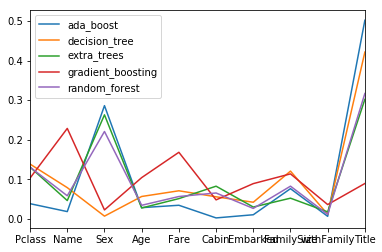

In [30]:
# 各featureの寄与度
importances = {}
for name,model in models:
    if name in ['logistic_regression', 'sgd_classifier', 'perceptron', 'svm', 'linear_svc', 'k-nearest_neighbors', 'gaussian_naive bayes']:
       continue
    importances[name] = model.feature_importances_
pd.DataFrame(importances, index=test_df.columns).plot()
plt.show()

In [31]:
# 予測誤りの傾向
from sklearn.metrics import confusion_matrix, classification_report
for name,model in models:
    print(name)
    predict_y = model.predict(train_x)
    print(confusion_matrix(train_y, predict_y))
    print(classification_report(train_y, predict_y))

random_forest


[[499  50]
 [ 78 264]]
             precision    recall  f1-score   support

          0       0.86      0.91      0.89       549
          1       0.84      0.77      0.80       342

avg / total       0.86      0.86      0.86       891

decision_tree
[[535  14]
 [ 54 288]]
             precision    recall  f1-score   support

          0       0.91      0.97      0.94       549
          1       0.95      0.84      0.89       342

avg / total       0.93      0.92      0.92       891

extra_trees


[[510  39]
 [ 73 269]]
             precision    recall  f1-score   support

          0       0.87      0.93      0.90       549
          1       0.87      0.79      0.83       342

avg / total       0.87      0.87      0.87       891

ada_boost
[[476  73]
 [ 76 266]]
             precision    recall  f1-score   support

          0       0.86      0.87      0.86       549
          1       0.78      0.78      0.78       342

avg / total       0.83      0.83      0.83       891

gradient_boosting
[[521  28]
 [ 40 302]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94       549
          1       0.92      0.88      0.90       342

avg / total       0.92      0.92      0.92       891

perceptron
[[492  57]
 [112 230]]
             precision    recall  f1-score   support

          0       0.81      0.90      0.85       549
          1       0.80      0.67      0.73       342

avg / total       0.81      0.81      0.81       891

sgd_class

             precision    recall  f1-score   support

          0       0.85      0.87      0.86       549
          1       0.79      0.75      0.77       342

avg / total       0.83      0.83      0.83       891

svm
[[491  58]
 [ 88 254]]
             precision    recall  f1-score   support

          0       0.85      0.89      0.87       549
          1       0.81      0.74      0.78       342

avg / total       0.83      0.84      0.83       891

linear_svc
[[480  69]
 [ 82 260]]
             precision    recall  f1-score   support

          0       0.85      0.87      0.86       549
          1       0.79      0.76      0.77       342

avg / total       0.83      0.83      0.83       891

k-nearest_neighbors
[[488  61]
 [ 60 282]]
             precision    recall  f1-score   support

          0       0.89      0.89      0.89       549
          1       0.82      0.82      0.82       342

avg / total       0.86      0.86      0.86       891

gaussian_naive bayes
[[429 120]
 [ 6

In [32]:
# 出力したファイルの内容を確認
submit.to_csv('random_forest_submit.csv', index=False)
!head random_forest_submit.csv

PassengerId,Survived
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1
